In [1]:
# compatibilité python 2 et python 3
from __future__ import division, print_function, unicode_literals

# imports
import numpy as np
import os
import skimage

# stabilité du notebook d'une exécution à l'autre
np.random.seed(42)

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# ignorer les warnings inutiles (voir SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

def disp_img(images, rows = 1, h=30, w=20) :
    fig=plt.figure(figsize=(h, w))
    columns = math.ceil(len(images)/rows)    
    spec = gridspec.GridSpec(ncols=columns, nrows=rows, figure=fig)
    for i in range(0, len(images)):
        img = images[i]
        fig.add_subplot(spec[math.floor(i/columns), i%columns])
        plt.axis('off')
        plt.imshow(img)
    plt.show()

## Le code de chargement du fichier.

In [2]:
from scipy import misc
from scipy import ndimage
from os import listdir
from os.path import isfile, join
import math
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy

"""I'd rather list all files and read them myself than use a lib that reads every file since i don't need all of them"""
def load_images(folder, nb_images) :
    img_list = []
    #go to the right path
    folder = join("projectdataset", "livrable1", folder)
    folder_path = join(os.getcwd(), folder)
    #list files in folder
    files = [f for f in listdir(folder_path) 
             if isfile(join(folder_path, f))]
    #Iterate nb_images times
    for i in range(nb_images) :
        #Load image
        img = imageio.imread(join(folder_path, files[i]))
        #Add it the the list
        img_list.append(img)
    return img_list

def load_image(folder, id_image) :
    #go to the right path
    folder = join("projectdataset", "livrable1", folder)
    folder_path = join(os.getcwd(), folder)
    #list files in folder
    files = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
    #Load image
    return imageio.imread(join(folder_path, files[id_image-1]))


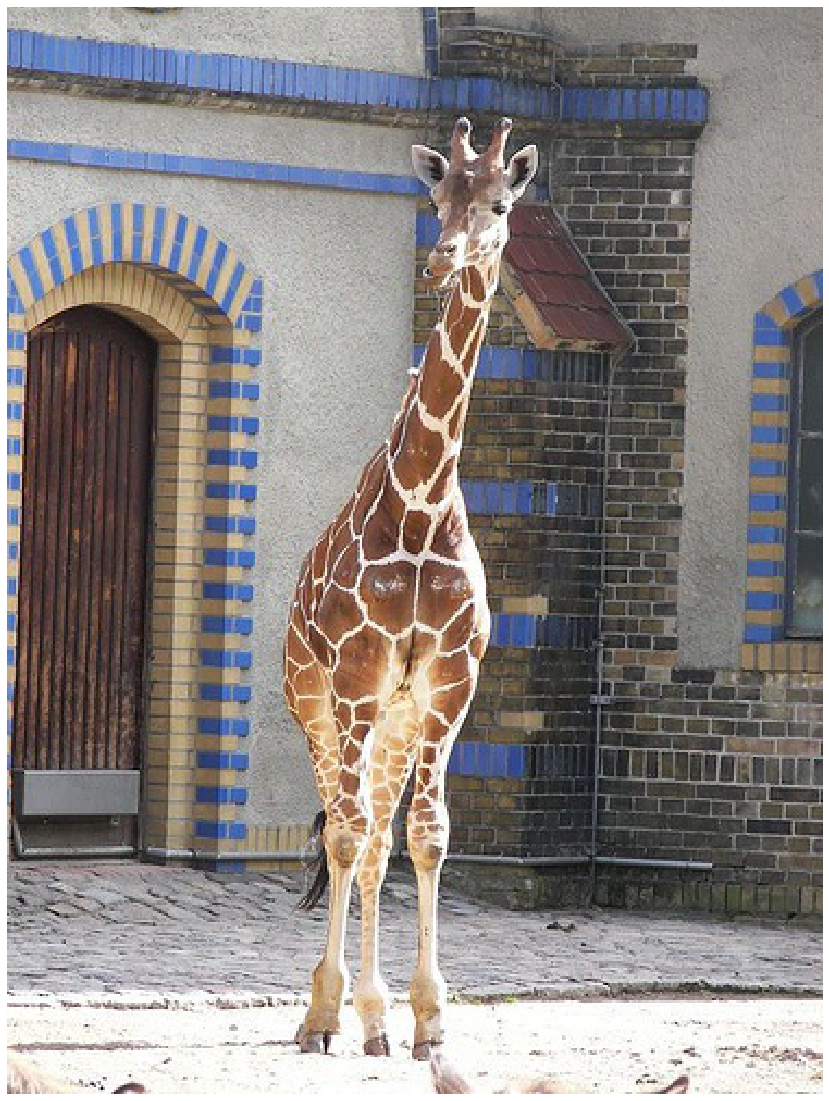

In [3]:
im = load_image("Noisy", 115)
disp_img([im])

## Le code du débruitage sur un sous-ensemble d’images bruitées.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]
stop
[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


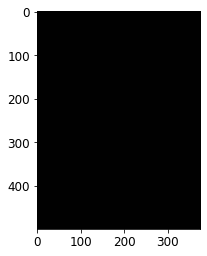

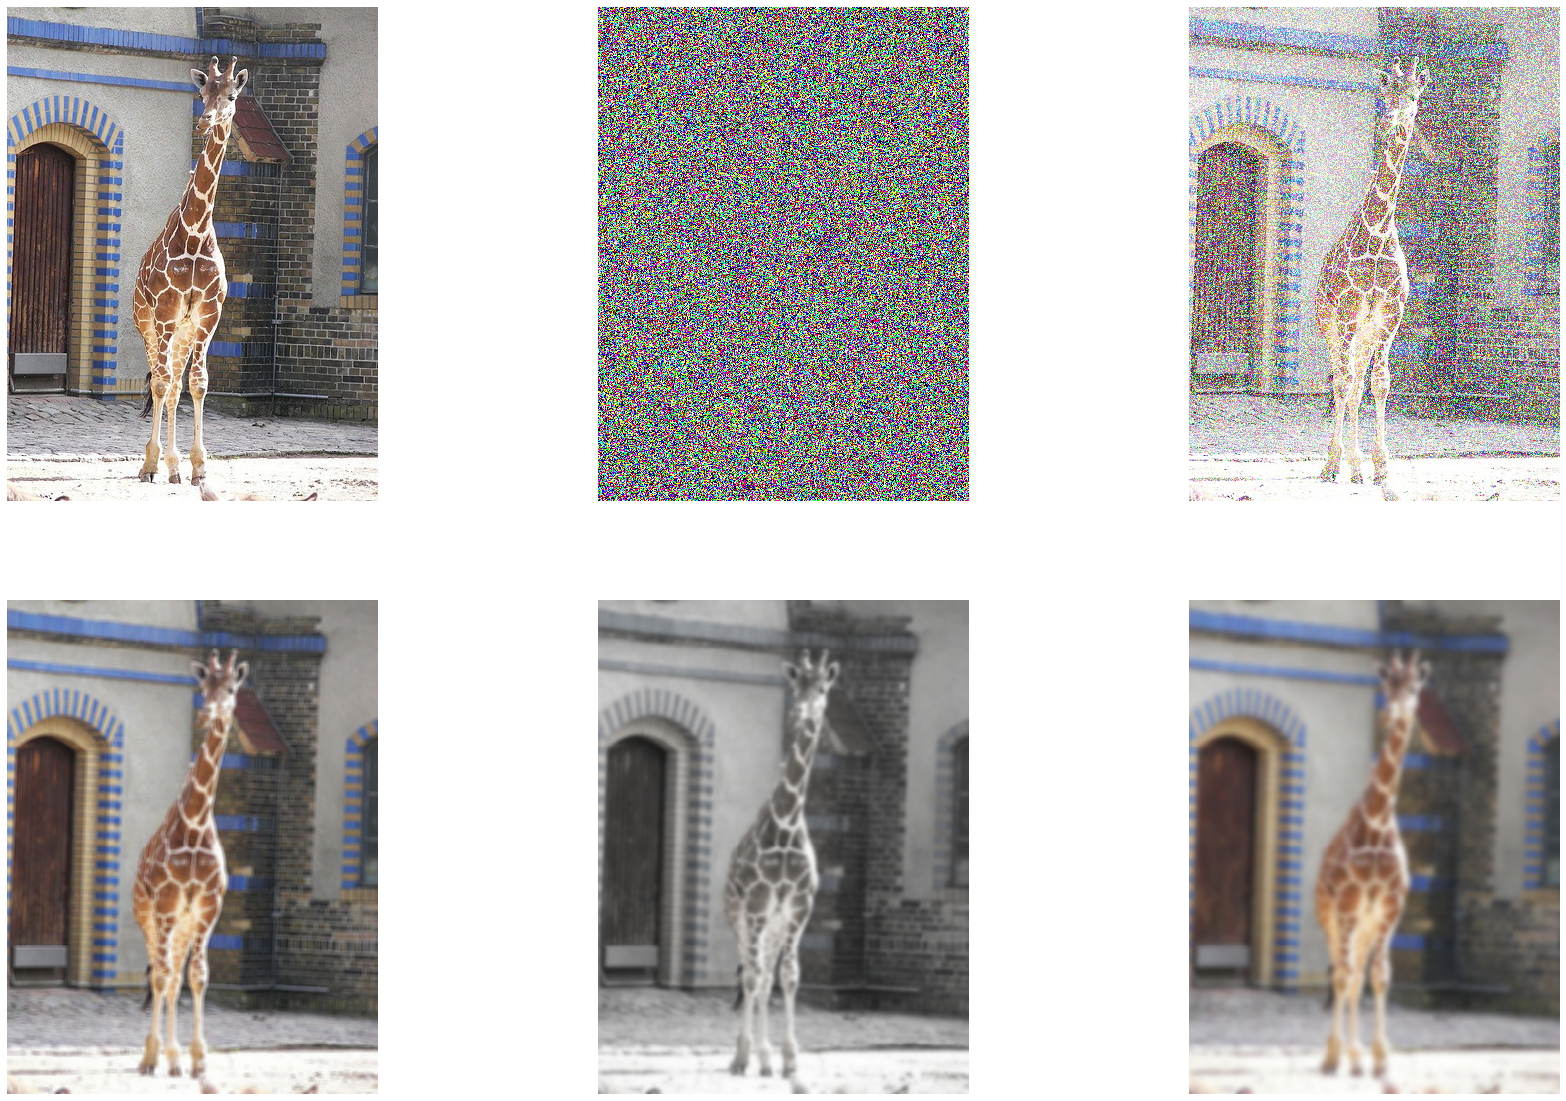

In [64]:
from skimage import filters
#load les images (")")
#bruiter l'image à la mano
#appliquer des filtres
noise =  np.clip(np.floor(np.random.normal(loc=0, scale=255, size=im.shape)),0,255)
# print(im)
# print("hi")
# print(im+noise)
noisy = np.clip(np.floor(np.add(im,noise)), 0,255).astype(int)
# print(noisy)
# print(noisy.shape)
# print(im.shape)

im_blured = ndimage.uniform_filter(im, size=(5, 5, 1))

im_blured2 = ndimage.gaussian_filter(im, sigma=2)

im_blured3 = filters.gaussian(im, 3, multichannel=True)
# plt.imshow(im)
# print(noise)
# print(noise+1)
print(np.clip(im,0,1))
print("stop")
print(np.clip(im+noise,0,1).astype(int))
plt.imshow(np.clip(im+noise,0,1).astype(int))
# print(np.clip(noise+1,0,255))
disp_img([im, noise, noisy, im_blured, im_blured2, im_blured3],2)
    #median
    #gaussian

explication

## Le code de l’affutage sur un sous-ensembles d’images floutées.

In [5]:
#load les images (3)
#flouter l'image à la mano
#appliquer des filtres
    #laplacian
    #sobel (c'est peut être déjà un laplacien sobel, à voir)
    #fourier

explication du code

## Une étude de cas explicitant les compromis entre ces deux opérations. Cette partie du livrable doit inclure le bruitage d’images et montrer la perte de détails, ou l’affutage d’images et montrer l’apparition du bruit.

### Bruitage d'images

In [6]:
#bruiter l'image
    #blur
    #parasites
#soustraire ori et processed
#on devrait voir les zones de détails perdus

### Affutage d'images

In [7]:
#gaussian blur


#laplacian
#sobel (c'est peut être déjà un laplacien sobel, à voir)
#fourier

#soustr 

### Explication des compromis